<a href="https://colab.research.google.com/github/Valgueiro/dataScience_exercises/blob/master/teste_hipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/blood_pressure.csv",encoding = "ISO-8859-1")

In [4]:
df.head()
# os dados sao pareados

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [5]:
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


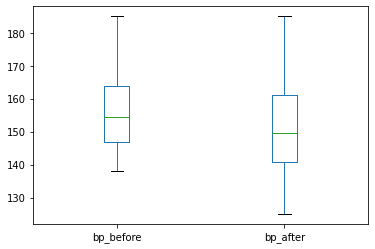

In [6]:
df[['bp_before', 'bp_after']].plot(kind='box')

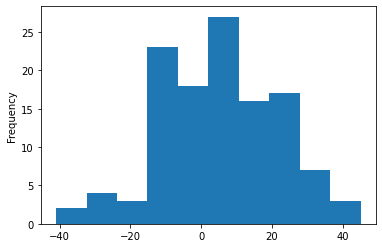

In [10]:
#Verificando se a diferença segue a gaussiana (R - ela segue sim, são dados paramétricos)
df['bp_difference'] = df['bp_before'] - df['bp_after']
df['bp_difference'].plot(kind='hist')

In [11]:
#Shapiro-Wilk teste de normalidade (valor,p-value). Hipótese nula: a população é normalmente distribuída. 
stats.shapiro(df['bp_difference'])
# Como o P-value é alto, a hipótese nula é verdadeira

(0.9926842451095581, 0.7841846942901611)

In [12]:
#Executando o teste t-test. Hipótese nula:  não houve mundança.
stats.ttest_rel(df['bp_before'], df['bp_after'])
# Como o P-value é baixo, a hipotese nula é falsa, o que quer dizer que há mudanças.

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

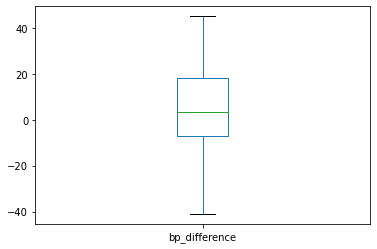

In [13]:
#Checando simetria. Como há uma simetria, é possivel utilizar wilcoxon
df[['bp_difference']].plot(kind='box')

In [21]:
stats.wilcoxon(df['bp_before'], df['bp_after'])
# O p-value também dá baixo, como esperado.

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

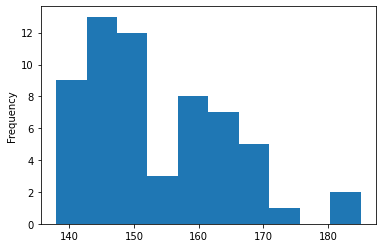

In [15]:
df[df['sex'] == 'Female']['bp_before'].plot(kind='hist')

In [22]:
stats.shapiro(df[df['sex'] == 'Female']['bp_before'])
# Dados de mulheres nao seguem uma gaussiana

(0.9277511835098267, 0.001596352318301797)

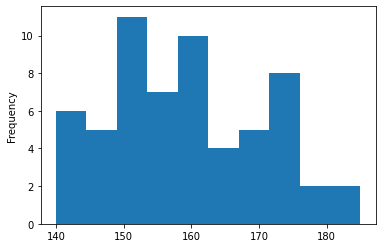

In [17]:
df[df['sex'] == 'Male']['bp_before'].plot(kind='hist')

In [23]:
stats.shapiro(df[df['sex'] == 'Male']['bp_before'])
# seguem razoavelmente uma gaussiana

(0.9689898490905762, 0.13019868731498718)

In [25]:
# Hipotese nula: Amostras vem de populações com a mesma distribuição
stats.mannwhitneyu(df[df['sex'] == 'Male']['bp_before'],df[df['sex'] == 'Female']['bp_before'])
# R - Falso, elas nao tem a mesma distribuiçao

MannwhitneyuResult(statistic=1261.5, pvalue=0.0023602725314639354)

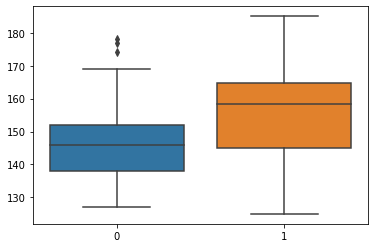

In [26]:
import seaborn as sns
data1 = df[df['sex'] == 'Female']['bp_after']
data2 = df[df['sex'] == 'Male']['bp_after']
sns.boxplot(data=[data1, data2])

In [27]:
properties=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
properties = properties[properties['price'] > 30000]
properties['price_m2'] = properties['price']/properties['area']
properties.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,price_m2
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,3837.209302
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,3109.756098
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,4000.000000
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,3092.783505
5,320000,-8.026516,-34.917791,2.0,50.0,1.0,2.0,1.0,Casa Amarela,Recife,Recife,Pernambuco,apart,6400.000000


## Exercício 1: Verifique se existe diferença para imóveis à venda entre em termos de preço, preço m2 e área entre apartamentos e casas usando testes estatísticos e visualize as distribuições com boxplots.

In [30]:
# Todos os dados sao não-pareados
houses = properties[properties.type=='house']
aparts = properties[properties.type=='apart']
aparts.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,price_m2
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,3837.209302
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,3109.756098
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,4000.000000
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,3092.783505
5,320000,-8.026516,-34.917791,2.0,50.0,1.0,2.0,1.0,Casa Amarela,Recife,Recife,Pernambuco,apart,6400.000000


### Price

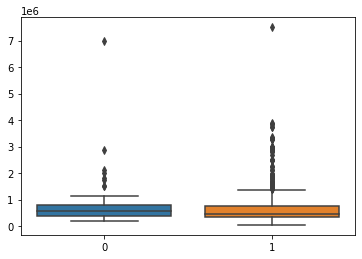

In [32]:
#box plot
import seaborn as sns

sns.boxplot(data=[houses.price, aparts.price])

In [35]:
# Shapiro-Wilk teste de normalidade (valor,p-value). Hipótese nula: a população é normalmente distribuída. 
stats.shapiro(houses.price)
# nao é normalmente distribuida

(0.4965358376502991, 2.562438651022847e-14)

In [36]:
# Shapiro-Wilk teste de normalidade (valor,p-value). Hipótese nula: a população é normalmente distribuída. 
stats.shapiro(aparts.price)
# nao é normalmente distribuida

(0.6545624732971191, 3.825544807606751e-43)

In [45]:
# Hipotese nula: Amostras vem de populações com a mesma distribuição
stats.mannwhitneyu(houses.price, aparts.price)


MannwhitneyuResult(statistic=36320.5, pvalue=0.04210920423317535)

Como o P-value do teste Mann Whitney foi baixo (0.04) as amostras nao seguem a mesma distribuição. Então, há sim uma diferença estatística entre os preços.

### Price m2

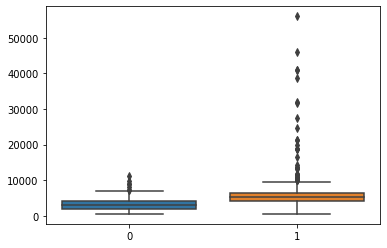

In [33]:
import seaborn as sns

sns.boxplot(data=[houses.price_m2, aparts.price_m2])

### Area


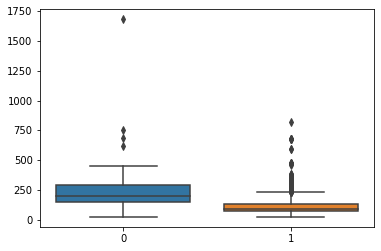

In [34]:
import seaborn as sns

sns.boxplot(data=[houses.area, aparts.area])

## Exercício 2: Realize a mesma análise comparando dois bairros que possuam um grande número de imóveis nos dados.

In [65]:
properties.suburb.value_counts()[:2]

Boa Viagem     159
Santo Amaro    108
Name: suburb, dtype: int64

### Comparando em Boa viagem

In [68]:
bv_properties = properties[properties.suburb == 'Boa Viagem']
bv_houses = bv_properties[bv_properties.type == 'house']
bv_aparts = bv_properties[bv_properties.type == 'apart']

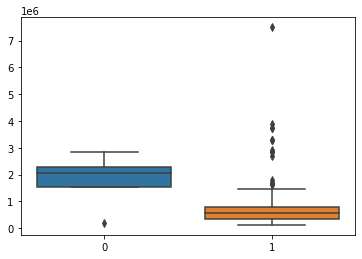

In [69]:
#box plot
import seaborn as sns
sns.boxplot(data=[bv_houses.price, bv_aparts.price])

In [70]:
# Shapiro-Wilk teste de normalidade (valor,p-value). Hipótese nula: a população é normalmente distribuída. 
stats.shapiro(bv_houses.price)
# é normalmente distribuida

(0.8946330547332764, 0.4048925042152405)

In [71]:
# Shapiro-Wilk teste de normalidade (valor,p-value). Hipótese nula: a população é normalmente distribuída. 
stats.shapiro(bv_aparts.price)
# não é normalmente distribuida

(0.6085184812545776, 1.2052690507218015e-18)

In [72]:
# Hipotese nula: Amostras vem de populações com a mesma distribuição
stats.mannwhitneyu(bv_houses.price, bv_aparts.price)


MannwhitneyuResult(statistic=173.0, pvalue=0.0666106224900691)

Como o P-value do teste Mann Whitney foi baixo (0.06) as amostras nao seguem a mesma distribuição. Então, há sim uma diferença estatística entre os preços.